In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import subprocess
from sklearn import tree
from os import system
from IPython.display import SVG
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns

**Reading the data set**

In [2]:
def read_dataset():
    df = pd.read_csv("../input/mines-vs-rocks/sonar.all-data.csv")# Reading input sheet with read_csv method
    X=df.iloc[:,0:60]
    y=df.iloc[:,-1]
    #Encode the independent variable 
    encoder=LabelEncoder()
    encoder.fit(y)
    Y=encoder.transform(y)
    return(X,Y)

In [3]:
X,Y=read_dataset()

**Shuffle the data to mix up rows**

In [4]:
X,Y=shuffle(X,Y,random_state=1)

**Split dataset into training set and test set**

In [5]:


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

**Applying RandomForestClassifier**

   *  To find the best hyper parameters for sonar dataset
        * max_depth : max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data
        * min_samples_leaf is The minimum number of samples required to be at a leaf node
        * n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data


In [6]:

from sklearn.ensemble import RandomForestClassifier

max_depth_array = [2,3,4,5]
min_samples_leaf_array = [2,3,4,5,6,7,8]
n_estimators_array = [10,20,30,40,50,60,70,80,90,100]

# Finding ROC_AUC_SCORE & Confusion Matrix for train and test data with multiple max depths,min_samples_leaf,n_estimators
for x in max_depth_array:
    for y in min_samples_leaf_array:
        for z in n_estimators_array:
            randomforest_classifier = RandomForestClassifier(criterion='gini',
                max_depth=x, max_features='auto',min_samples_leaf=y,
                n_estimators=z,random_state=0)
            
            rf=randomforest_classifier.fit(X_train, y_train)
            y_pred = rf.predict(X_train)
            print("max_depth,min_samples_leaf,n_estimator -: ",x,'-',y,'-',z)
            MSE = np.square(np.subtract(y_train,y_pred)).mean() 
            print(MSE)
            print(confusion_matrix(y_train, y_pred))

max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10
0.125
[[78  2]
 [16 48]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 20
0.1527777777777778
[[75  5]
 [17 47]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 30
0.1388888888888889
[[78  2]
 [18 46]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 40
0.13194444444444445
[[78  2]
 [17 47]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 50
0.13194444444444445
[[78  2]
 [17 47]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 60
0.13194444444444445
[[77  3]
 [16 48]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 70
0.1527777777777778
[[77  3]
 [19 45]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 80
0.1388888888888889
[[77  3]
 [17 47]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 90
0.13194444444444445
[[77  3]
 [16 48]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 100
0.13194444444444445
[[77  3]
 [16 48]]
max_depth,min_samples_leaf,n_estimator -:  2 - 3 - 10
0.11805555555555555
[[78  2]
 [15

**Min mean Square error and better prediction & confusion matrix**

max_depth,min_samples_leaf,n_estimator -: 3 - 2 - 100

MSE - 0.041666666666666664

Confusion Matrix

[[80 0]

[ 6 58]]

Min Mean squared error -  0.041666666666666664


Text(0.5, 1.0, 'Random Forest Classifier \n Confusion Matrix')

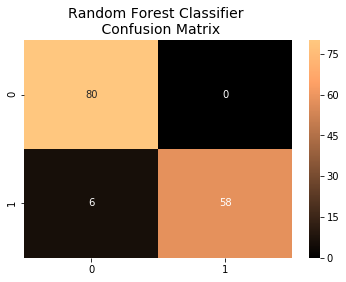

In [7]:
randomforest_classifier = RandomForestClassifier(criterion='gini',
                max_depth=3, max_features='auto',min_samples_leaf=2,
                n_estimators=100,random_state=0)
            
rf=randomforest_classifier.fit(X_train, y_train)
y_pred = rf.predict(X_train)
MSE = np.square(np.subtract(y_train,y_pred)).mean() 
print('Min Mean squared error - ',MSE)
rf_cf=confusion_matrix(y_train, y_pred)

colors = ["#0101DF", "#DF0101"]
sns.heatmap(rf_cf,annot=True, cmap=plt.cm.copper)
plt.title('Random Forest Classifier \n Confusion Matrix', fontsize=14)

**GradientBoostingClassifier**

**Automated to find out best hyper parameters with prediction and min mse**

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# Finding min mean squared error & Confusion Matrix for train and test data with multiple max depths,min_samples_leaf,n_estimators
max_depth_array = [2,3,4,5]
max_features_array = [2,3,4,5,6,7,8]
n_estimators_array = [10,20,30,40,50,60,70,80,90,100]
sample_weight_array= [1,2,3,4,5,6,7,8]

for x in max_depth_array:
    for y in max_features_array:
        for z in n_estimators_array:
            for w in sample_weight_array:
                gradientBoosting_classifier = GradientBoostingClassifier(
                    learning_rate=0.05,
                    n_estimators=z,
                    max_depth=x,
                    random_state=1,
                    max_features=y)
            
                gb=gradientBoosting_classifier.fit(X_train, y_train)
                y_pred = gb.predict(X_train)

                print("max_depth,min_samples_leaf,n_estimator -: ",x,'-',y,'-',z,'-',w)
                MSE = np.square(np.subtract(y_train,y_pred)).mean() 
                print(MSE)
                print(confusion_matrix(y_train, y_pred))

max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 1
0.18055555555555555
[[80  0]
 [26 38]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 2
0.18055555555555555
[[80  0]
 [26 38]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 3
0.18055555555555555
[[80  0]
 [26 38]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 4
0.18055555555555555
[[80  0]
 [26 38]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 5
0.18055555555555555
[[80  0]
 [26 38]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 6
0.18055555555555555
[[80  0]
 [26 38]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 7
0.18055555555555555
[[80  0]
 [26 38]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 10 - 8
0.18055555555555555
[[80  0]
 [26 38]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 20 - 1
0.1111111111111111
[[80  0]
 [16 48]]
max_depth,min_samples_leaf,n_estimator -:  2 - 2 - 20 - 2
0.1111111111111111
[[80  0]
 [16 48]]
max_depth,min_samples_leaf,n_est

**Min mean Square error and better prediction & confusion matrix**

max_depth,min_samples_leaf,n_estimator -: 2 - 2 - 90 - 1

MSE - 0.0

Confusion Matrix

[[80 0]

[ 0 64]

max_depth,min_samples_leaf,n_estimator -:  5 - 8 - 100 - 8
Min Mean squared error -  0.0
Accuracy score:  1.0
(144,)


Text(0.5, 1.0, 'Random Forest Classifier \n Confusion Matrix')

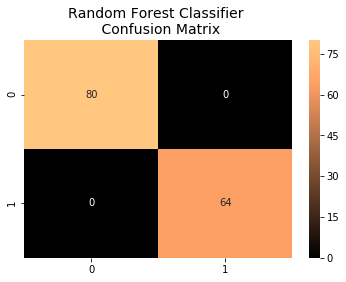

In [9]:
from sklearn.metrics import accuracy_score
gradientBoosting_classifier = GradientBoostingClassifier(
                    learning_rate=0.05,
                    n_estimators=90,
                    max_depth=2,
                    random_state=1,
                    max_features=2)
            
gb=gradientBoosting_classifier.fit(X_train, y_train)
y_pred = gb.predict(X_train)

print("max_depth,min_samples_leaf,n_estimator -: ",x,'-',y,'-',z,'-',w)
MSE = np.square(np.subtract(y_train,y_pred)).mean() 
print('Min Mean squared error - ',MSE)
rf_cf=confusion_matrix(y_train, y_pred)
print("Accuracy score: ", accuracy_score(y_train,y_pred))
print(y_train.shape)
sns.heatmap(rf_cf,annot=True, cmap=plt.cm.copper)
plt.title('Random Forest Classifier \n Confusion Matrix', fontsize=14)